In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("commitpack.jsonl", lines=True)
df.head()

,commit,old_file,new_file,old_contents,new_contents,subject,message,lang,license,repos
0,e905334869af72025592de586b81650cb3468b8a,sentry/queue/client.py,sentry/queue/client.py,"""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...","""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...",Declare queues when broker is instantiated,Declare queues when broker is instantiated\n,Python,bsd-3-clause,"imankulov/sentry,BuildingLink/sentry,zenefits/..."
1,45fc612fdc5a354dbf0bacccd345b1aebcc73e59,tests/test_openweather.py,tests/test_openweather.py,# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,"Revert ""Fix openweather unit tests""","Revert ""Fix openweather unit tests""\n\nThis re...",Python,bsd-3-clause,"rnyberg/pyfibot,EArmour/pyfibot,aapa/pyfibot,a..."
2,22faee82e1f070532c0dfe5777136e842233a1f0,src/dashboard/src/main/templatetags/percentage.py,src/dashboard/src/main/templatetags/percentage.py,"from django.template import Node, Library\n\nr...","from django.template import Node, Library\n\nr...","Fix % only showing 0 or 100%, everything betwe...","Fix % only showing 0 or 100%, everything betwe...",Python,agpl-3.0,"artefactual/archivematica-history,artefactual/..."
3,950ac9130bafe1fced578bf61d746b047830bfa0,automata/base/exceptions.py,automata/base/exceptions.py,"#!/usr/bin/env python3\n""""""Exception classes s...","#!/usr/bin/env python3\n""""""Exception classes s...","Remove ""validation"" from RejectionException do...","Remove ""validation"" from RejectionException do...",Python,mit,caleb531/automata
4,462ae981ed5b9cc9a8f46e97dfe7908c0827ea64,account_invoice_line_description/res_config.py,account_invoice_line_description/res_config.py,# -*- coding: utf-8 -*-\n#####################...,# -*- coding: utf-8 -*-\n#####################...,"Fix implied_group, it still refers to the old ...","Fix implied_group, it still refers to the old ...",Python,agpl-3.0,"Antiun/account-invoicing,hbrunn/account-invoic..."


In [2]:
def build_instruction_prompt(instruction: str):
    return '''
You are an AI programming assistant, utilizing the DeepSeek Coder model, developed by DeepSeek Company, and you only answer questions related to computer science. For politically sensitive questions, security and privacy issues, and other non-computer science questions, you will refuse to answer.
### Instruction:
{}
### Response:
'''.format(instruction.strip()).lstrip()

df['input'] = df['old_contents'] + df['new_contents'] + build_instruction_prompt("") + df['subject']
df['input_length'] = df['input'].apply(len)
df.head()

,commit,old_file,new_file,old_contents,new_contents,subject,message,lang,license,repos,input,input_length
0,e905334869af72025592de586b81650cb3468b8a,sentry/queue/client.py,sentry/queue/client.py,"""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...","""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...",Declare queues when broker is instantiated,Declare queues when broker is instantiated\n,Python,bsd-3-clause,"imankulov/sentry,BuildingLink/sentry,zenefits/...","""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...",2588
1,45fc612fdc5a354dbf0bacccd345b1aebcc73e59,tests/test_openweather.py,tests/test_openweather.py,# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,"Revert ""Fix openweather unit tests""","Revert ""Fix openweather unit tests""\n\nThis re...",Python,bsd-3-clause,"rnyberg/pyfibot,EArmour/pyfibot,aapa/pyfibot,a...",# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,1746
2,22faee82e1f070532c0dfe5777136e842233a1f0,src/dashboard/src/main/templatetags/percentage.py,src/dashboard/src/main/templatetags/percentage.py,"from django.template import Node, Library\n\nr...","from django.template import Node, Library\n\nr...","Fix % only showing 0 or 100%, everything betwe...","Fix % only showing 0 or 100%, everything betwe...",Python,agpl-3.0,"artefactual/archivematica-history,artefactual/...","from django.template import Node, Library\n\nr...",992
3,950ac9130bafe1fced578bf61d746b047830bfa0,automata/base/exceptions.py,automata/base/exceptions.py,"#!/usr/bin/env python3\n""""""Exception classes s...","#!/usr/bin/env python3\n""""""Exception classes s...","Remove ""validation"" from RejectionException do...","Remove ""validation"" from RejectionException do...",Python,mit,caleb531/automata,"#!/usr/bin/env python3\n""""""Exception classes s...",2402
4,462ae981ed5b9cc9a8f46e97dfe7908c0827ea64,account_invoice_line_description/res_config.py,account_invoice_line_description/res_config.py,# -*- coding: utf-8 -*-\n#####################...,# -*- coding: utf-8 -*-\n#####################...,"Fix implied_group, it still refers to the old ...","Fix implied_group, it still refers to the old ...",Python,agpl-3.0,"Antiun/account-invoicing,hbrunn/account-invoic...",# -*- coding: utf-8 -*-\n#####################...,3407


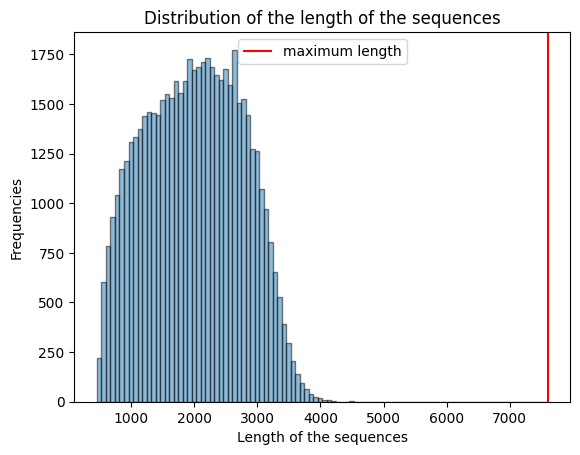

In [3]:
def plot_hist(data, title='', xlabel='', bins=100) :
    plt.figure()
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.5)
    plt.axvline(max(data), c='r', label='maximum length')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequencies')
    plt.legend()
    plt.plot()

plot_hist(df['input_length'], title='Distribution of the length of the sequences', xlabel='Length of the sequences')

In [4]:
from transformers import AutoTokenizer

MODEL = "deepseek-ai/deepseek-coder-6.7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(MODEL, trust_remote_code=True)

def get_token_seq_length(dataset, tokenizer, data_column):
    seq_length = []
    for content in dataset[data_column]:
        seq_length.append(len(tokenizer(content).tokens()))
    return seq_length

df['token_seq_length'] = get_token_seq_length(df, tokenizer, 'input')

C:\Users\AdminLocal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


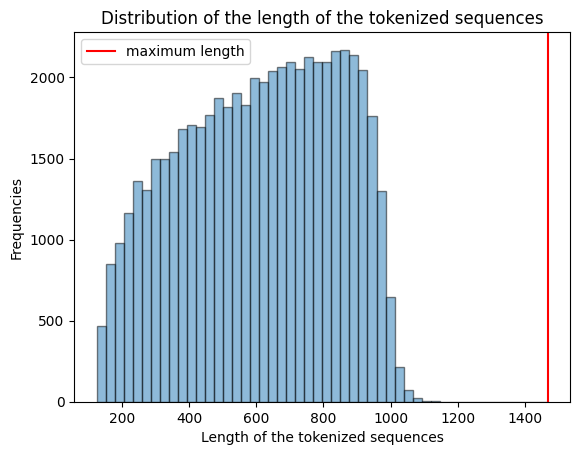

In [5]:
plot_hist(df['token_seq_length'], title='Distribution of the length of the tokenized sequences', xlabel='Length of the tokenized sequences', bins=50)

56025
55827


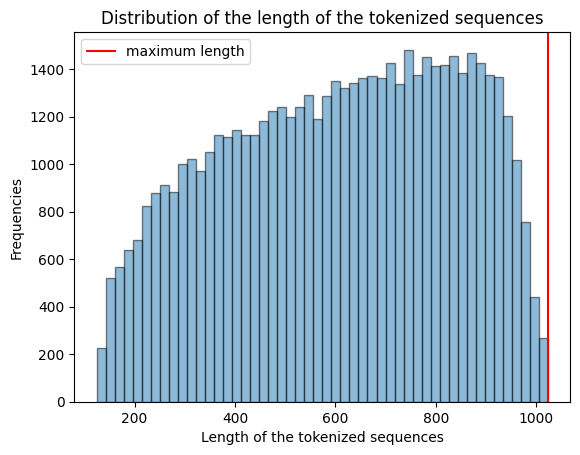

In [6]:
print(df.shape[0])
df_filtered = df[df['token_seq_length'] < 1024]
print(df_filtered.shape[0])
plot_hist(df_filtered['token_seq_length'], title='Distribution of the length of the tokenized sequences', xlabel='Length of the tokenized sequences', bins=50)

In [7]:
df_filtered.drop(columns=['input', 'input_length', 'token_seq_length'], inplace=True)
df_filtered.head()

C:\Users\AdminLocal\AppData\Local\Temp\ipykernel_2572\3805291297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['input', 'input_length', 'token_seq_length'], inplace=True)


,commit,old_file,new_file,old_contents,new_contents,subject,message,lang,license,repos
0,e905334869af72025592de586b81650cb3468b8a,sentry/queue/client.py,sentry/queue/client.py,"""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...","""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...",Declare queues when broker is instantiated,Declare queues when broker is instantiated\n,Python,bsd-3-clause,"imankulov/sentry,BuildingLink/sentry,zenefits/..."
1,45fc612fdc5a354dbf0bacccd345b1aebcc73e59,tests/test_openweather.py,tests/test_openweather.py,# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,"Revert ""Fix openweather unit tests""","Revert ""Fix openweather unit tests""\n\nThis re...",Python,bsd-3-clause,"rnyberg/pyfibot,EArmour/pyfibot,aapa/pyfibot,a..."
2,22faee82e1f070532c0dfe5777136e842233a1f0,src/dashboard/src/main/templatetags/percentage.py,src/dashboard/src/main/templatetags/percentage.py,"from django.template import Node, Library\n\nr...","from django.template import Node, Library\n\nr...","Fix % only showing 0 or 100%, everything betwe...","Fix % only showing 0 or 100%, everything betwe...",Python,agpl-3.0,"artefactual/archivematica-history,artefactual/..."
3,950ac9130bafe1fced578bf61d746b047830bfa0,automata/base/exceptions.py,automata/base/exceptions.py,"#!/usr/bin/env python3\n""""""Exception classes s...","#!/usr/bin/env python3\n""""""Exception classes s...","Remove ""validation"" from RejectionException do...","Remove ""validation"" from RejectionException do...",Python,mit,caleb531/automata
4,462ae981ed5b9cc9a8f46e97dfe7908c0827ea64,account_invoice_line_description/res_config.py,account_invoice_line_description/res_config.py,# -*- coding: utf-8 -*-\n#####################...,# -*- coding: utf-8 -*-\n#####################...,"Fix implied_group, it still refers to the old ...","Fix implied_group, it still refers to the old ...",Python,agpl-3.0,"Antiun/account-invoicing,hbrunn/account-invoic..."


In [8]:

benchmark_samples = df_filtered.sample(n=100, random_state=42)
remaining_samples = df_filtered.drop(benchmark_samples.index)
benchmark_samples.to_csv('compare_eval.csv', index=False)
remaining_samples.to_csv('commitpack.csv', index=False)

In [9]:
print(benchmark_samples['subject'])

1703     Use 'index' as the default page alias for lookups
52267                Define handler for tracking log files
18433    Make the openquake namespace compatible with o...
24687               Set MEDIA_ROOT setting for Production.
43069            Add tests for the SubmissionProcess model
                               ...                        
30481                          Add dialog title to example
39308    Add a regression test for the error-silencing ...
5678     Convert settings.INSTALLED_APPS to list before...
46588                   TEST allink_apps subtree - pulling
26159              Fix span decorator to work with asyncio
Name: subject, Length: 100, dtype: object
